In [26]:
!pip install yfinance

In [27]:
import statsmodels.api as sm
import yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
GetDJIinfo = yfinance.Ticker("^DJI")
DJIA = GetDJIinfo.history(period="2y")
DJIA.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-04,27634.630859,27727.449219,27612.080078,27649.779297,218200000,0,0
2019-12-05,27736.050781,27745.199219,27562.800781,27677.789062,208600000,0,0
2019-12-06,27839.679688,28035.849609,27839.679688,28015.060547,223310000,0,0
2019-12-09,27987.050781,28010.419922,27906.140625,27909.599609,217000000,0,0
2019-12-10,27900.650391,27949.019531,27804.000000,27881.720703,213250000,0,0


In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
df_train = DJIA[:-24]
df_test = DJIA[-24:]

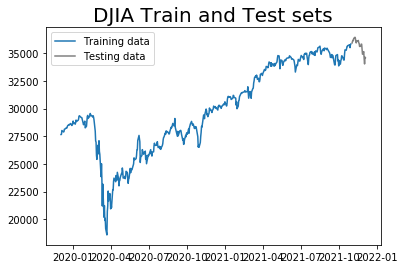

In [31]:
plt.title('DJIA Train and Test sets', size=20)
plt.plot(df_train['Close'], label='Training data')
plt.plot(df_test['Close'], color='gray', label='Testing data')
plt.legend();

In [36]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Model parameters
span = 12 
alpha = 2 / (span + 1)

# Train the model
model = SimpleExpSmoothing(df_train['Close'])
results = model.fit(smoothing_level=alpha, optimized=False)
predictions = results.forecast(steps=24)

# Evaluate
rmse = mean_squared_error(df_test['Close'], predictions, squared=False)

# Plot
plt.title(f'DJIA Simple Exponential Smoothing predictions\nRMSE = {np.round(rmse, 2)}', size=20)
plt.plot(df_train['Close'], label='Training data')
plt.plot(df_test['Close'], color='gray', label='Testing data')
plt.plot(predictions, color='orange', label='Predictions')
plt.legend();

C:\Users\limat\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\limat\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


TypeError: mean_squared_error() got an unexpected keyword argument 'squared'